In [1]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
from utils.save_read_graph import read
from section3.scenario1 import scenario_1
from section3.scenario3 import Scenario3

#Station by size, 1: 0, 2: 66, 3: 138
Number of tons covered by our network: 636.8981800501206
Number of tons sold in profit in our network: 200.09818005012076
#Station by size, 1: 23, 2: 46, 3: 244
Number of tons covered by our network: 1060.5266028954388
Number of tons sold in profit in our network: 380.62660289543925
#Station by size, 1: 22, 2: 18, 3: 291
Number of tons covered by our network: 1203.1327625071901
Number of tons sold in profit in our network: 456.13276250718997
#Station by size, 1: 4, 2: 20, 3: 310
Number of tons covered by our network: 1278.4608430052965
Number of tons sold in profit in our network: 498.86084300529666


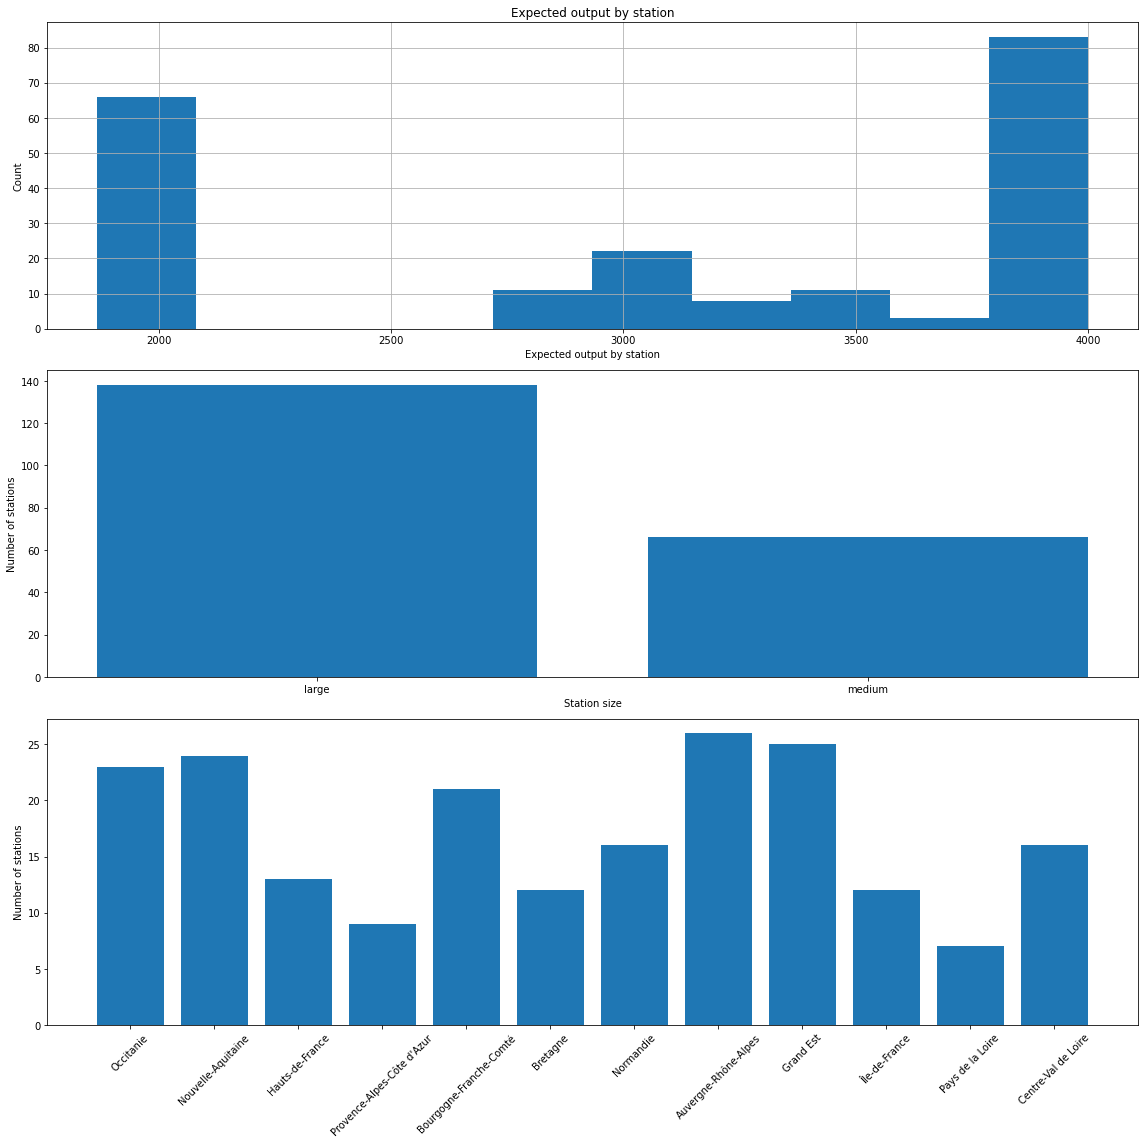

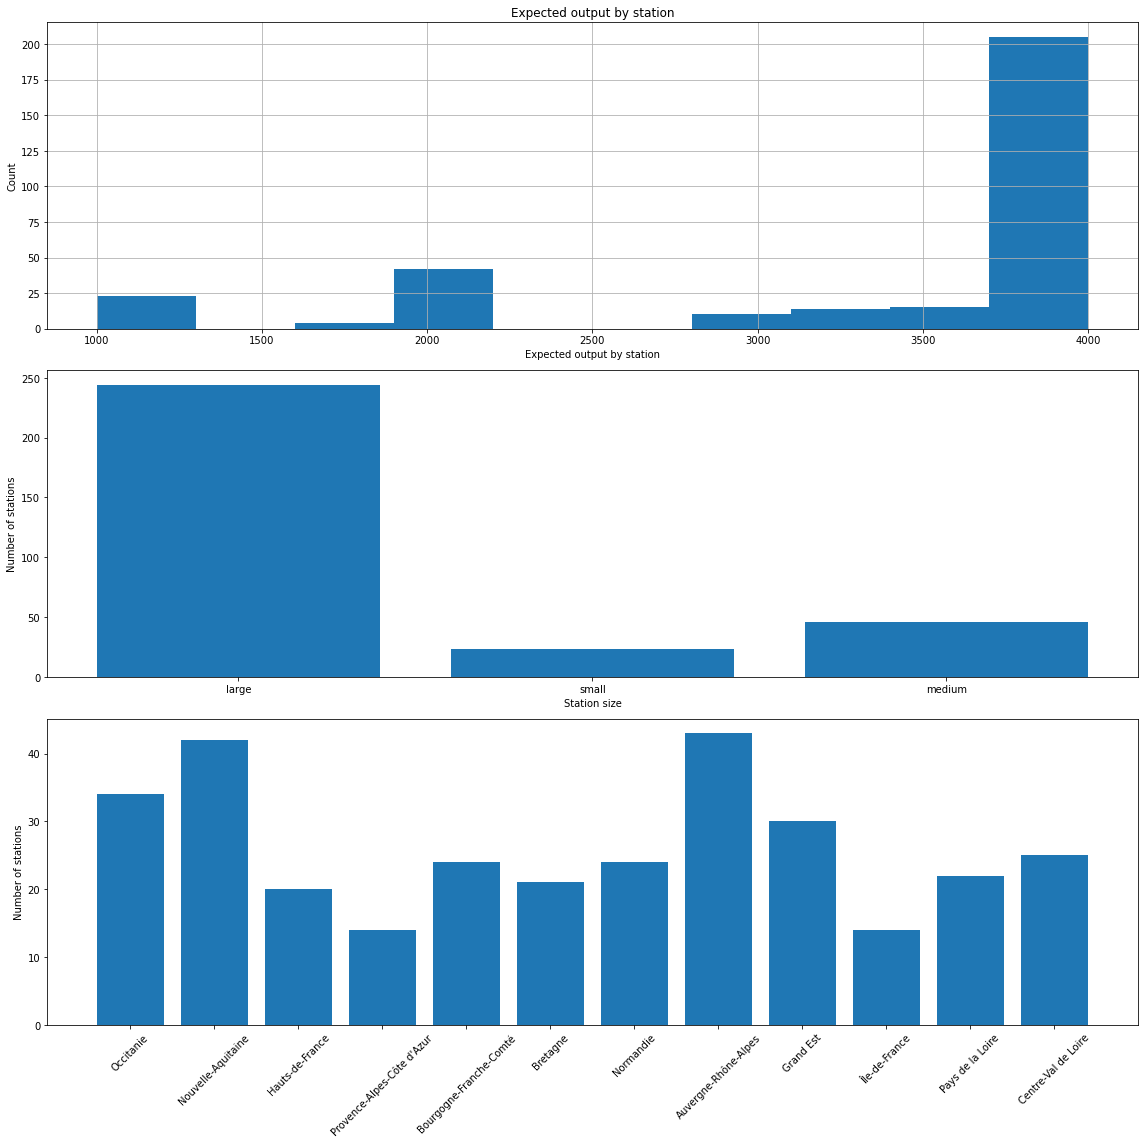

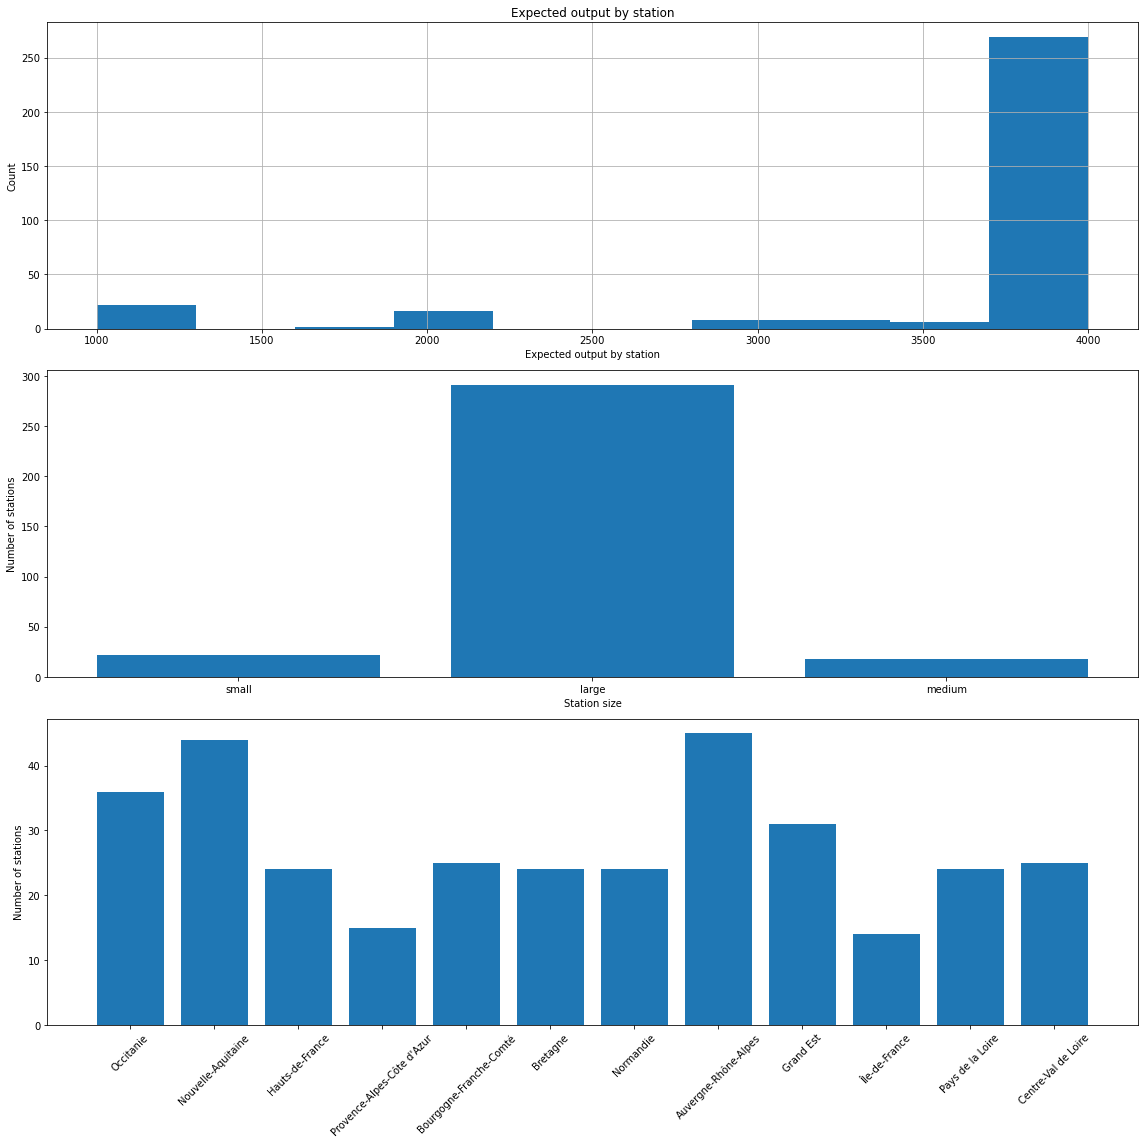

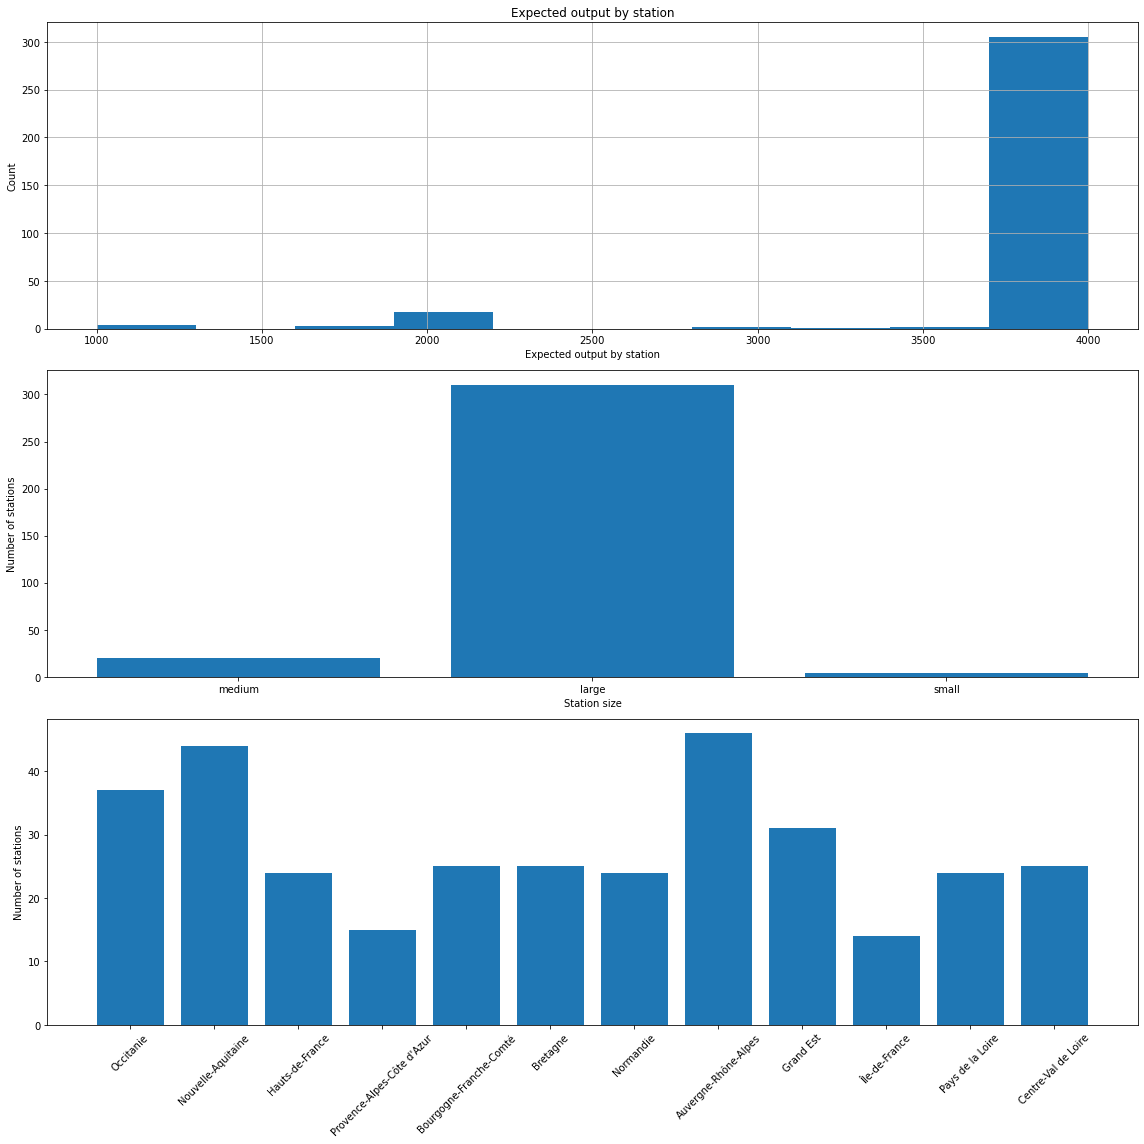

In [2]:
data_path = './data/'
network_path = './networks/p400R400000/'
cn, x, y = read(network_path)
x = {int(k): v for k, v in x.items() }
scenario_1(cn, x,metrics=True)

s3 = Scenario3(data_path, cn, x)


#Station by size scenario 1, 1: 4, 2: 20, 3: 310
#Station by size scenario 3, 1: 24, 2: 25, 3: 283
Number of tons covered by our network scenario 1: 1278.4608430052965
Number of tons covered by our network scenario 3: 1184.6141345950655
Number of tons sold in profit in our network: 443.8141345950649


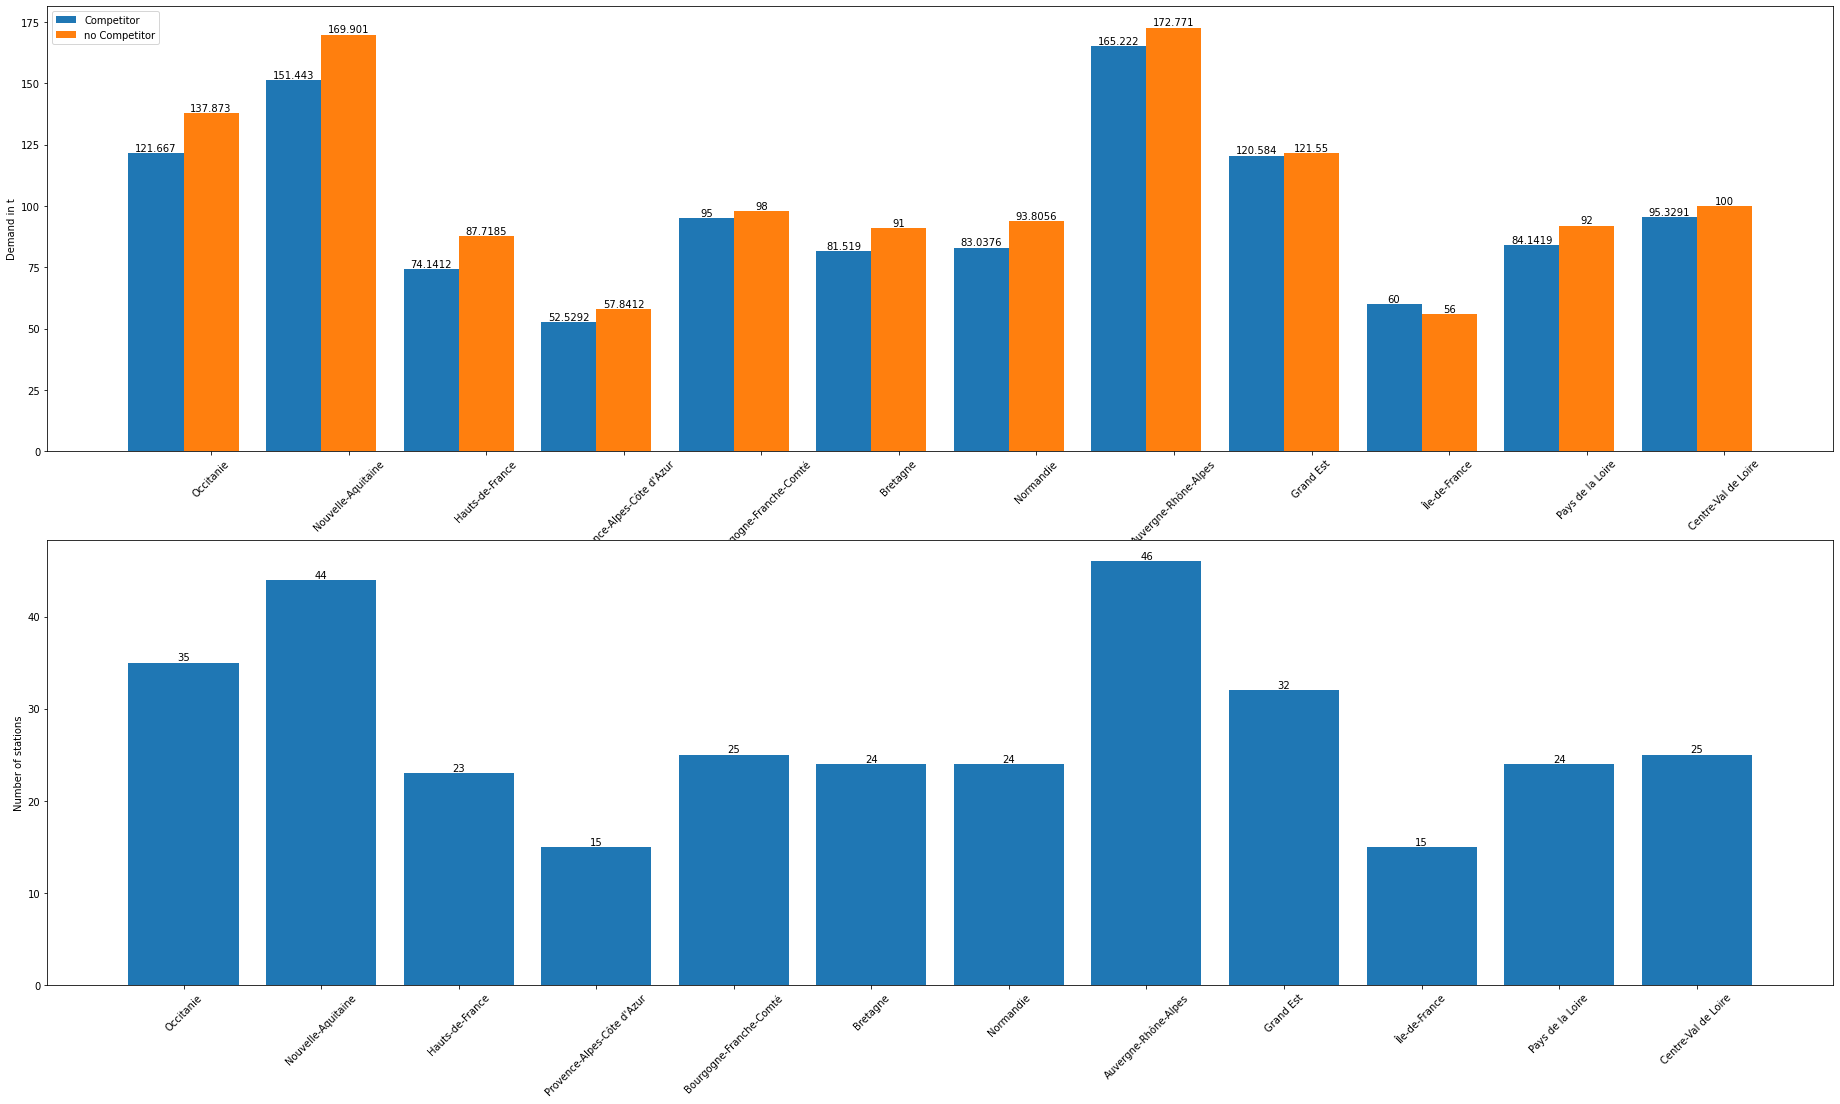

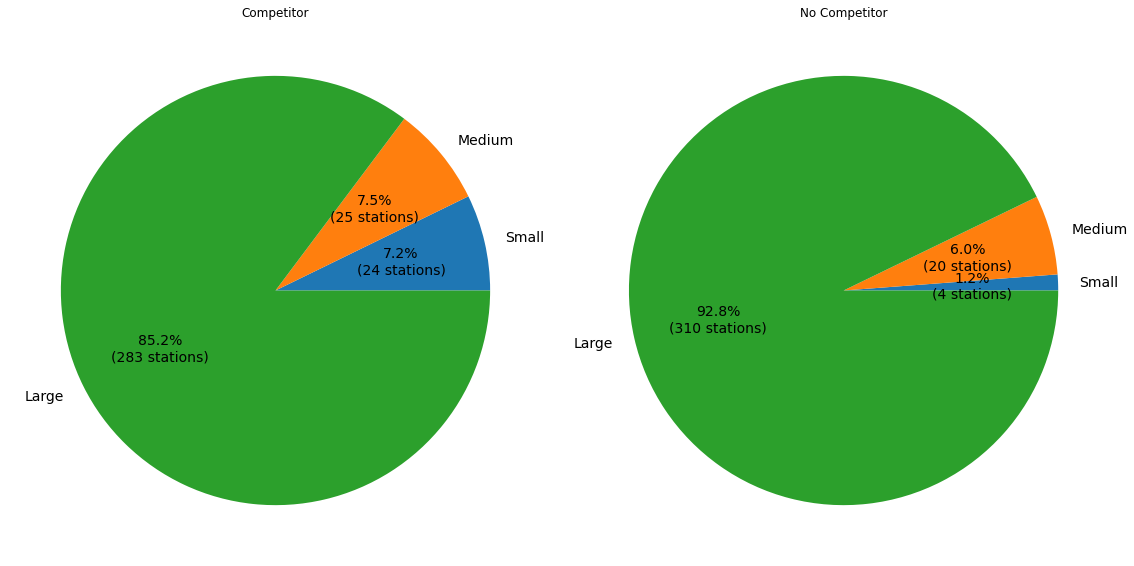

In [3]:
s3.summary()


In [98]:
s3.describe()

We plan to deploy 180 H2 stations
The existent player has 327 in France Metropole
113 stations lies within our transportation network
5 stations or  0.028 percent collapse with our deployment plan


#Station by size, 1: 0, 2: 87, 3: 93
Number of tons covered by our network: 393.8995428058016
Number of tons sold in profit in our network: 53.221823987088925
total estimated market demand in our network: 481.7813128272744


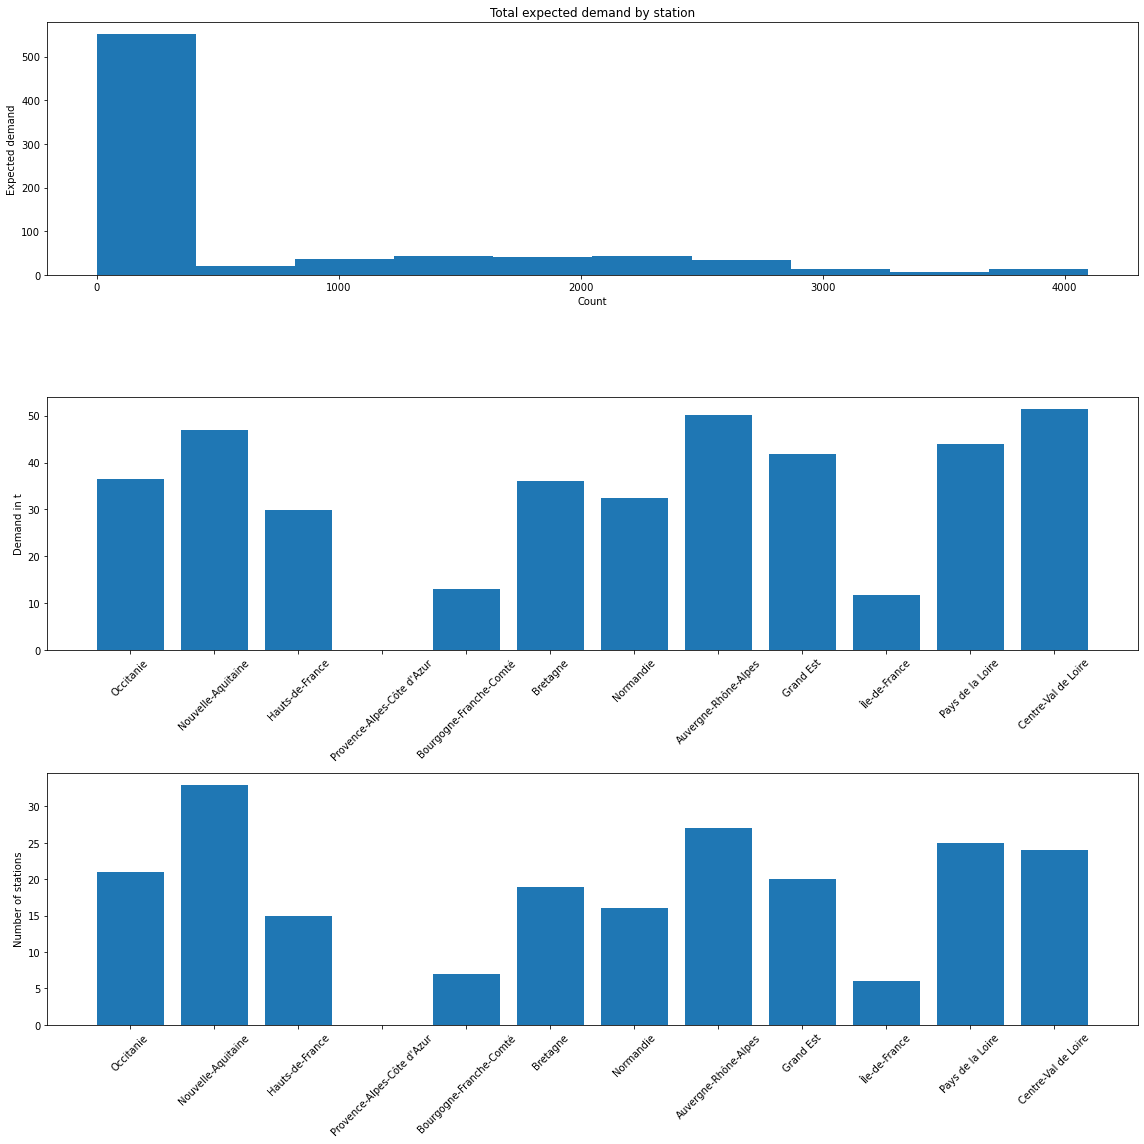

In [79]:
s3.summary()

In [84]:
def match_stations(stations, cn, threshold=2000):
    pr_point = gpd.GeoSeries(
    {i: Point(P) for i, P in dict(cn.nodes(data='coordinates')).items()}
    )

    is_station = {i: 0 for i, P in dict(cn.nodes(data='coordinates')).items()}
    for ele in stations.Coordinates_point:
        if pr_point.distance(ele).min() <= 4000:
            n = pr_point.distance(ele).argmin()
            is_station[n] = 1
        
    return is_station


In [116]:
def check_rival(cn):
    rival = {}
    for n in range(len(cn.nodes)):
        rival[n] = 0
        if cn.nodes[n]['S3P3_conversion_planned'] == 1 and cn.nodes[n]['is_Station'] > 0:
            rival[n] = 1
    return rival


In [117]:
p3R4 = read('./networks/p300R400000/')
cn, x, y = p3R4
stations = match_stations(existent_stations, cn)
nx.set_node_attributes(cn, stations, "S3P3_conversion_planned")
rival = check_rival(cn)
nx.set_node_attributes(cn, rival, "S3P3_rival_station")


In [102]:
117

117

In [103]:
sum(rival.values())

74

In [105]:
cn.nodes[0]


{'coordinates': array([ 506136.72083333, 6288902.33666667]),
 'region_name': 'Occitanie',
 'is_OD': 0.0,
 'is_Station': 0.0,
 'station_size': 0,
 'competitor': 0,
 'airliquide': 0,
 'conversion': 0,
 'S3P3_conversion_planned': 0,
 'S3P3_rival_station': 0}